# **STAT0041 Algorithms and Data Structures: ICA 2022**

## **Question 1: Sorting and Order Statistics**

100%|██████████| 10/10 [02:15<00:00, 13.56s/it]


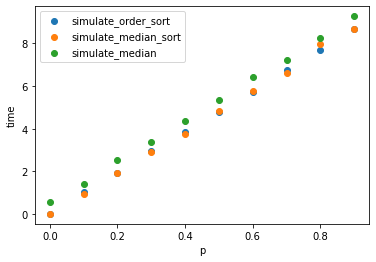

In [ ]:
from statistics import median
from tqdm import tqdm
import numpy as np
import time
import matplotlib.pyplot as plt


# DELIVERABLE 1

def simulate_order_sort(m, n, p):
    x = np.sort(np.random.normal(0, 1, size=(n)))
    y = np.zeros(shape=(m))
    for i in range(m):
        y[i] = x[np.random.randint(low=0, high=n)] # low = inclusive, high = exclusive
        if np.random.random() < p:
            x = np.sort(np.random.normal(0, 1, size=(n)))
    return y


# DELIVERABLE 3

def simulate_median_sort(m, n, p):
    x = np.sort(np.random.normal(0, 1, size=(n)))
    y = np.zeros(shape=(m))
    for i in range(m):
        y[i] = x[int(np.ceil(n/2))]
        if np.random.random() < p:
            x = np.sort(np.random.normal(0, 1, size=(n)))
    return y

def simulate_median(m, n, p):
    x = np.random.normal(0, 1, size=(n))
    y = np.zeros(shape=(m))
    for i in range(m):
        y[i] = np.median(x)
        if np.random.random() < p:
            x = np.sort(np.random.normal(0, 1, size=(n)))
    return y
  
# DELIVERABLE 2 AND 3

# Plotting and compare the wall-clock time for three functions

step = 0.1
p = [step * i for i in range(int(1/step))]
order_sort_time = []
median_sort_time = []
median_time = []
m = 10000
n = 10000


for i in tqdm(p):

    # recording run time for simulate_order_sort
    start_time = time.time()
    simulate_order_sort(m, n, i)
    order_sort_time.append(time.time() - start_time)
    
    # recording run time for simulate_median_sort
    start_time = time.time()
    simulate_median_sort(m, n, i)
    median_sort_time.append(time.time() - start_time)

    # recording run time for simulate_median
    start_time = time.time()
    simulate_median(m, n, i)
    median_time.append(time.time() - start_time)

# Adding details to the plot
plt.xlabel('p')
plt.ylabel('time')
plt.scatter(p, order_sort_time, label='simulate_order_sort')
plt.scatter(p, median_sort_time, label='simulate_median_sort')
plt.scatter(p, median_time, label='simulate_median')
plt.legend()
plt.show()

### Deliverable 2
In the simulate_order_sort function, the data is re-sorted with probability p after each request for an order statistic. This means that for higher values of p, there is a higher probability that the data will be re-sorted more frequently, which increases the overall run time of the function. On the other hand, for lower values of p, the data is less likely to be re-sorted, which results in a lower overall run time for the function. This is why the variability in time increases as the value of p increases.

### Deliverable 3

My initial expections were as follow:

The simulate_order_sort function is the slowest of the three functions because it needs to sort the data and draw a random integer o from 1 to n to determine the order statistic to be returned. Sorting the data is a computationally expensive operation, and drawing a random integer o from 1 to n adds additional computational overhead.

The simulate_median_sort function is slightly faster than the simulate_order_sort function because it still needs to sort the data, but it does not need to draw a random integer o from 1 to n to determine the order statistic to be returned. Instead, it always sets o to n/2, which is the position of the median in the sorted array. This reduces the computational overhead compared to the simulate_order_sort function.

The simulate_median function is the fastest of the three functions because it does not need to sort the data at all. Instead, it calculates the median using the built-in np.median function, which can calculate the median of an unsorted array. This can eliminate the need for sorting the data, which greatly reduces the computational overhead compared to the other two functions.

After the empericial investigation, my expectation was only accurate for smaller values of m and n (at 100 and 1000), where the time difference is much clearer. The results of the plots are relatively inconsistent when run at n = 10000 and m = 10000, where it is fair to say that their performance is not vastly different from each other.


## **Question 2: Stretchable Array**

### **Deliverable 1 and 3**

In [ ]:
import ctypes
import math
import numpy as np
 
class s_array:
     
    # DELIVERABLE 1

    def __init__(self, capacity, length):

        # create a stretchable array of capacity at least l with all entries initialized to 0
        # the index starts at 0
        self.x = self.s_array_create(capacity)
        self.capacity = len(self.x)
        self.length = 0


    def s_array_create(self, l):

        # create an array with the minimal waste requirement
        min_length = math.ceil(np.log2(l))
        newcap = [0]*(2**min_length)
        return newcap

    def s_array_set(self, i, value):

        # set the i-th position of the stretchable array to value, index starts at 0
        
        # if the highest index is within the defined capacity then no need to update the capacity
        if i <= self.capacity-1:
          self.x[i] = value
          self.length = i

        # if the highest index is larger than the defined capacity then double the capacity
        else:
          new_data = self.s_array_create(2*len(self.x))

        # transferring data from old array
          for k in range(len(self.x)):
            new_data[k] = self.s_array_get(k)

        # update the attributes accordingly
          self.length = i
          self.capacity = len(new_data)
          self.x = new_data
          self.x[i] = value

        return self.x

        
    def s_array_get(self, i):
        # function to get the i-th element, index starts at 0
        return self.x[i]
     
    def s_array_len(self):
        # function to find the length of the array
        return self.length

    # DELIVERABLE 3

    def find_max_nonzero(self):

        # function for searching the highest index of the non-zero element
        u = 0
        for i in range(len(self.x)):
          if self.x[i] != 0:
            u = i
        return u

    def s_array_pack(self):

        # find the index of the last non-zero element of x
        last_non_zero_index = self.find_max_nonzero()

        # find the minimal waste capacity, similar to that in Deliverable 1
        best_capacity = 2 ** (math.ceil(np.log2(last_non_zero_index)))

        # only update the minimal waste capacity is smaller than the current capacity
        if best_capacity <= self.capacity:

            # transfer data to the new array
            new_data = [0] * best_capacity
            for i in range(best_capacity):
                new_data[i] = self.x[i]

            # update the attributes accordingly
            self.x = new_data
            self.capacity = best_capacity

            return self.x

        # if minimal waste capacity is larger or equal to current capacity then no action is needed from this function
        else:
            return("Cannot be shrinked")

### **Deliverable 2**
One benefit of this approach is that it can be useful for certain algorithms that specifically require this property. For example, some algorithms that use bitwise operations may perform better on arrays that have a capacity that is a power of 2.

A potential drawback is that the capacity of the array tends to me much larger than the actual length of the data, which causes waste in memory. Also, if the array is frequently resized, it may be inefficient to always require moving large amounts of data each time the array is resized. 

One alternative is to use a linked list to store the data, where each node in it contains a single element of the data. An advantage is that it can be easily resized without the need to move large amounts of data. It can also be more efficient in terms of memory usage, as it only allocates memory for the nodes used, rather than pre-allocating a fixed-size array. However, accessing individual elements in the list may be slower than with an array, as it requires traversing the list to find the desired element, especially in algorithms that requires random access to data.


### **Deliverable 4**
One potential criticism of the s_array_pack function is that it does not handle "gaps" in the data (i.e., if there are many zero elements between non-zero elements). This could be an area for improvement, given 0s are defined as being irrelevant and could be similarly reduced to save memory.

A potential limitation of my implementation is that it uses a linear search to find the last non-zero element in x.data. This means that the running time of the function is proportional to the length of x.data, which can be inefficient for large arrays. A more efficient approach would be to use a binary search to find the last non-zero element, which would have a running time of O(log n) instead of O(n).



### **Deliverable 5**

In [ ]:
# DELIVERABLE 5

# creating a stretchable array called arr

arr = s_array(6,0)
print("arr is defined as: ",arr.x)
print("Minimal waste capacity of arr is: ",arr.capacity)

arr is defined as:  [0, 0, 0, 0, 0, 0, 0, 0]
Minimal waste capacity of arr is:  8


In [ ]:
# set a value within the capacity of arr

print("Set value 5 at index 5:", arr.s_array_set(5,5))
print("It can be checked that the capacity has been defined as the special requirement, while the length of the array is the highest index that has been modified.")
print("Current Capacity of arr:", arr.capacity)
print("Current length of arr:", arr.length)

Set value 5 at index 5: [0, 0, 0, 0, 0, 5, 0, 0]
It can be checked that the capacity has been defined as the special requirement, while the length of the array is the highest index that has been modified.
Current Capacity of arr: 8
Current length of arr: 5


In [ ]:
# set a value within the capacity of arr

print("Set value 5 at index 15:", arr.s_array_set(15,5))
print("It can be seen that the capacity automatically doubled for setting value above the initial capacity. The old data was transferred onto the new array.")

Set value 5 at index 15: [0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5]
It can be seen that the capacity automatically doubled for setting value above the initial capacity. The old data was transferred onto the new array.


In [ ]:
# get value at an index

print("Get value at index 15:", arr.s_array_get(15))

Get value at index 15: 5


In [ ]:
# test s_array_pack()

print("To test s_array_pack, we can set the index-15th value of arr from 5 to 0, then apply the function to see if it is reduced to 8.")
print("Set value:", arr.s_array_set(15,0))
print("Apply s_array_pack:", arr.s_array_pack())
print("Check new capacity:", arr.capacity)

To test s_array_pack, we can set the index-15th value of arr from 5 to 0, then apply the function to see if it is reduced to 8.
Set value: [0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Apply s_array_pack: [0, 0, 0, 0, 0, 5, 0, 0]
Check new capacity: 8


## **Question 3: DFS and BFS using iGraph**

### **Deliverable 1**

In [ ]:
pip install igraph statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import igraph
import random
import time

def search_eval(m, n, p):
    # Initialize a m x 2 matrix to store the wall-clock times
    times = [[0, 0] for _ in range(m)]

    # Iterate over the number of simulations
    for i in range(m):
        # Generate a random adjacency matrix for the graph
        g = [[random.random() < p for _ in range(n)] for _ in range(n)]

        # Choose a random source vertex for the search
        source = random.randint(0, n - 1)

        # Create an igraph graph from the adjacency matrix
        graph = igraph.Graph.Adjacency(g)

        # Record the start time for BFS
        start_time = time.time()

        # Run BFS on the graph
        graph.bfs(source)

        # Record the end time for BFS and store it in the matrix
        end_time = time.time()
        times[i][0] = end_time - start_time

        # Record the start time for DFS
        start_time = time.time()

        # Run DFS on the graph
        graph.dfs(source)
        
        # Record the end time for DFS and store it in the matrix
        end_time = time.time()
        times[i][1] = end_time - start_time

    # Return the matrix of wall-clock times
    return times



### **Deliverable 2**

List of calculated p-values: [3.0742028408521916e-189, 3.382128889757289e-106, 0.0]
Sufficient evidence to claim that the running time are different when prob = 0.01
Sufficient evidence to claim that the running time are different when prob = 0.05
Sufficient evidence to claim that the running time are different when prob = 0.1


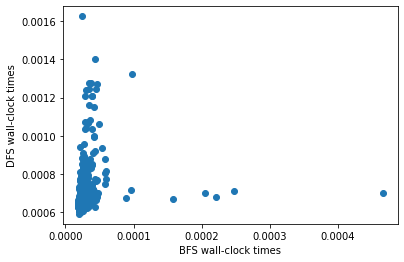

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest


# Set the number of simulations, number of vertices, and probabilities to test
m = 1000
n = 200
probabilities = [0.01, 0.05, 0.1]

# Initialize a list to store the p-values
p_values = []

# Iterate over the probabilities
for p in probabilities:
    # Run the search_eval function with the current probability
    r = search_eval(m, n, p)

    # Calculate the difference between the first and second columns of r
    diff = [a - b for a, b in r]

    # Perform a z-test on the differences to test the hypothesis that they come from a distribution with zero mean
    z, pval = ztest(diff)

    # Store the p-value
    p_values.append(pval)

# Print the p-values and conclusion for z-test

print("List of calculated p-values:",p_values)

theshold = 0.05

for i in range(len(p_values)):

  if p_values[i] > 0.05:
    print("Insufficient evidence to claim that the running time are different when prob =", probabilities[i])
    
  elif p_values[i] < 0.05:
    print("Sufficient evidence to claim that the running time are different when prob =", probabilities[i])

# Plot a scatterplot to show the differences

bfs_ct = []
dfs_ct = []
for i in r:
  bfs_ct.append(i[0])
  dfs_ct.append(i[1])

plt.scatter(bfs_ct, dfs_ct)
plt.xlabel('BFS wall-clock times')
plt.ylabel('DFS wall-clock times')
plt.show()

Given that most of the points are concentrated in the left corner of the scatterplot, and by looking at the scale, BFS is generally faster than DFS in this library. The z-tests on the difference between their run times are all significant for all values of p, which supports the conclusion.

### **Deliverable 3**

#### Code for depth_charge

In [ ]:
import igraph
import random

def depth_charge(m, w, d):
    # Initialize a m x 2 matrix to store the search steps
    steps = [[0, 0] for _ in range(m)]

    # Iterate over the number of simulations
    for i in range(m):

        # Create a directed graph with a root vertex and w children
        g = [[0, j] for j in range(1, w + 1)]

        # Choose a random child to start a chain
        v = random.randint(1, w)

        # Add the chain to the graph
        g += [(v, j) for j in range(w + 1, w + d + 1)]

        # Create an igraph graph from the edge list
        graph = igraph.Graph.TupleList(g, directed=True)

        # Run BFS on the graph
        order = graph.bfs(0)

        # Store the number of search steps for BFS
        steps[i][0] = order[0].index(w + d) + 1

        # Run DFS on the graph
        order = graph.dfs(0)

        # Store the number of search steps for DFS
        steps[i][1] = order[0].index(w + d) + 1

    # Return the matrix of search steps
    return steps
  

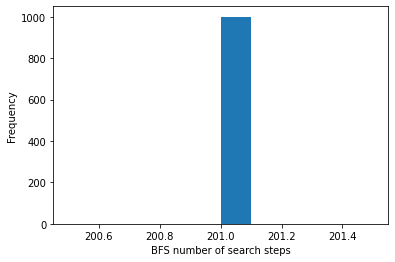

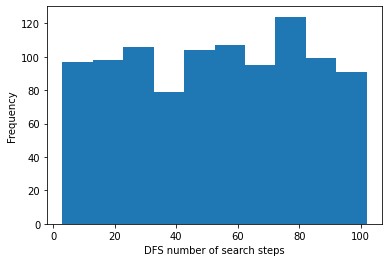

In [ ]:
import matplotlib.pyplot as plt

# Set the number of simulations, number of children, and chain length
m = 1000
w = 100
d = 100

# Run the depth_charge function with the given parameters
r = depth_charge(m, w, d)

# Plot a histogram of the first column
plt.hist([m[0] for m in r])
plt.xlabel('BFS number of search steps')
plt.ylabel('Frequency')
plt.show()

# Plot a histogram of the second column
plt.hist([m[1] for m in r])
plt.xlabel('DFS number of search steps')
plt.ylabel('Frequency')
plt.show()

#### Code for depth_charge_1

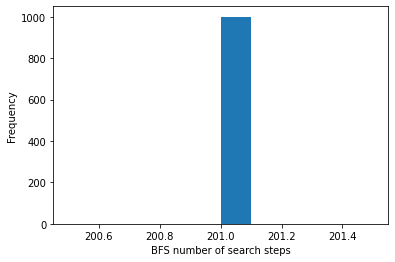

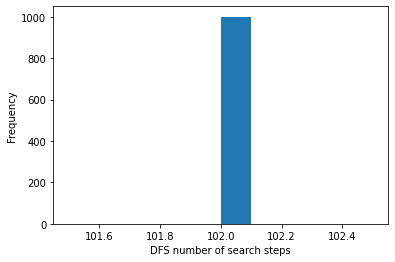

In [ ]:
def depth_charge_1(m, w, d):
    # Initialize a m x 2 matrix to store the search steps
    steps = [[0, 0] for _ in range(m)]

    # Iterate over the number of simulations
    for i in range(m):

        # Create a directed graph with a root vertex and w children
        g = [[0, j] for j in range(1, w + 1)]

        # Choose the first child to start a chain
        v = 1

        # Add the chain to the graph
        g += [(v, j) for j in range(w + 1, w + d + 1)]

        # Create an igraph graph from the edge list
        graph = igraph.Graph.TupleList(g, directed=True)

        # Run BFS on the graph
        order = graph.bfs(0)

        # Store the number of search steps for BFS
        steps[i][0] = order[0].index(w + d) + 1

        # Run DFS on the graph
        order = graph.dfs(0)

        # Store the number of search steps for DFS
        steps[i][1] = order[0].index(w + d) + 1

    # Return the matrix of search steps
    return steps
  
# Set the number of simulations, number of children, and chain length
m = 1000
w = 100
d = 100

# Run the depth_charge_1 function with the given parameters
r = depth_charge_1(m, w, d)

# Plot a histogram of the first column
plt.hist([m[0] for m in r])
plt.xlabel('BFS number of search steps')
plt.ylabel('Frequency')
plt.show()

# Plot a histogram of the second column
plt.hist([m[1] for m in r])
plt.xlabel('DFS number of search steps')
plt.ylabel('Frequency')
plt.show()

#### Code for depth_charge_final

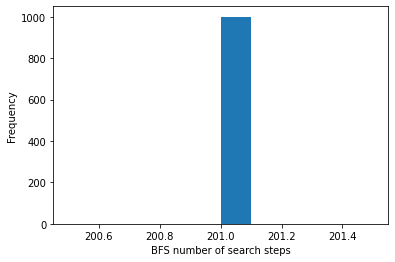

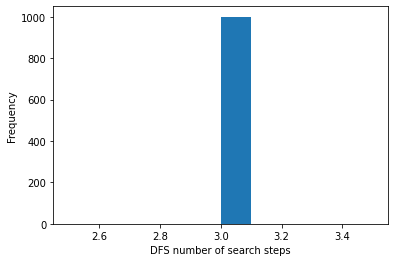

In [ ]:
def depth_charge_final(m, w, d):
    # Initialize a m x 2 matrix to store the search steps
    steps = [[0, 0] for _ in range(m)]

    # Iterate over the number of simulations
    for i in range(m):

        # Create a directed graph with a root vertex and w children
        g = [[0, j] for j in range(1, w + 1)]

        # Choose the w child to start a chain
        v = w

        # Add the chain to the graph
        g += [(v, j) for j in range(w + 1, w + d + 1)]

        # Create an igraph graph from the edge list
        graph = igraph.Graph.TupleList(g, directed=True)

        # Run BFS on the graph
        order = graph.bfs(0)

        # Store the number of search steps for BFS
        steps[i][0] = order[0].index(w + d) + 1

        # Run DFS on the graph
        order = graph.dfs(0)

        # Store the number of search steps for DFS
        steps[i][1] = order[0].index(w + d) + 1

    # Return the matrix of search steps
    return steps

# Set the number of simulations, number of children, and chain length
m = 1000
w = 100
d = 100

# Run the depth_charge_final function with the given parameters
r = depth_charge_final(m, w, d)

# Plot a histogram of the first column
plt.hist([m[0] for m in r])
plt.xlabel('BFS number of search steps')
plt.ylabel('Frequency')
plt.show()

# Plot a histogram of the second column
plt.hist([m[1] for m in r])
plt.xlabel('DFS number of search steps')
plt.ylabel('Frequency')
plt.show()
  

The observations from the histogram of depth_charge_1 support the conjecture from the ICA, where DFS takes roughly 102 (~100+1) steps compared to BFS at 201 (100+100). DFS is thus much more efficient than BFS in the case of dapth_charge_1.

In the case of depth_charge_final, the difference is even more observable when DFS only took 3 steps in the same context. 